<a href="https://colab.research.google.com/github/NeuronsUII/Pathologies_ArtDental_n/blob/main/Kotov%20Alexander/Coronal_train_yolov8_object_detection_on_custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.5/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
!nvidia-smi
import os
HOME = os.getcwd()
print(HOME)

Sat Mar  2 13:44:54 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8              10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

#!pip install roboflow --quiet

#from roboflow import Roboflow
#rf = Roboflow(api_key="YOUR_API_KEY")
#project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
#dataset = project.version(1).download("yolov8")

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="O364CBvA6Pd5qZBEH6EJ")
project = rf.workspace("joint-pathologies").project("joints-lcfax")
version = project.version(2)
dataset = version.download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=200 imgsz=416 plots=True

/content
100% 6.23M/6.23M [00:00<00:00, 120MB/s]
New https://pypi.org/project/ultralytics/8.1.20 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/Joints-2/data.yaml, epochs=200, patience=50, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1709387134.32e75af8d297.1194.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch7220.jpg  weights
P_curve.png					    train_batch7221.jpg
PR_curve.png					    train_batch7222.jpg


/content


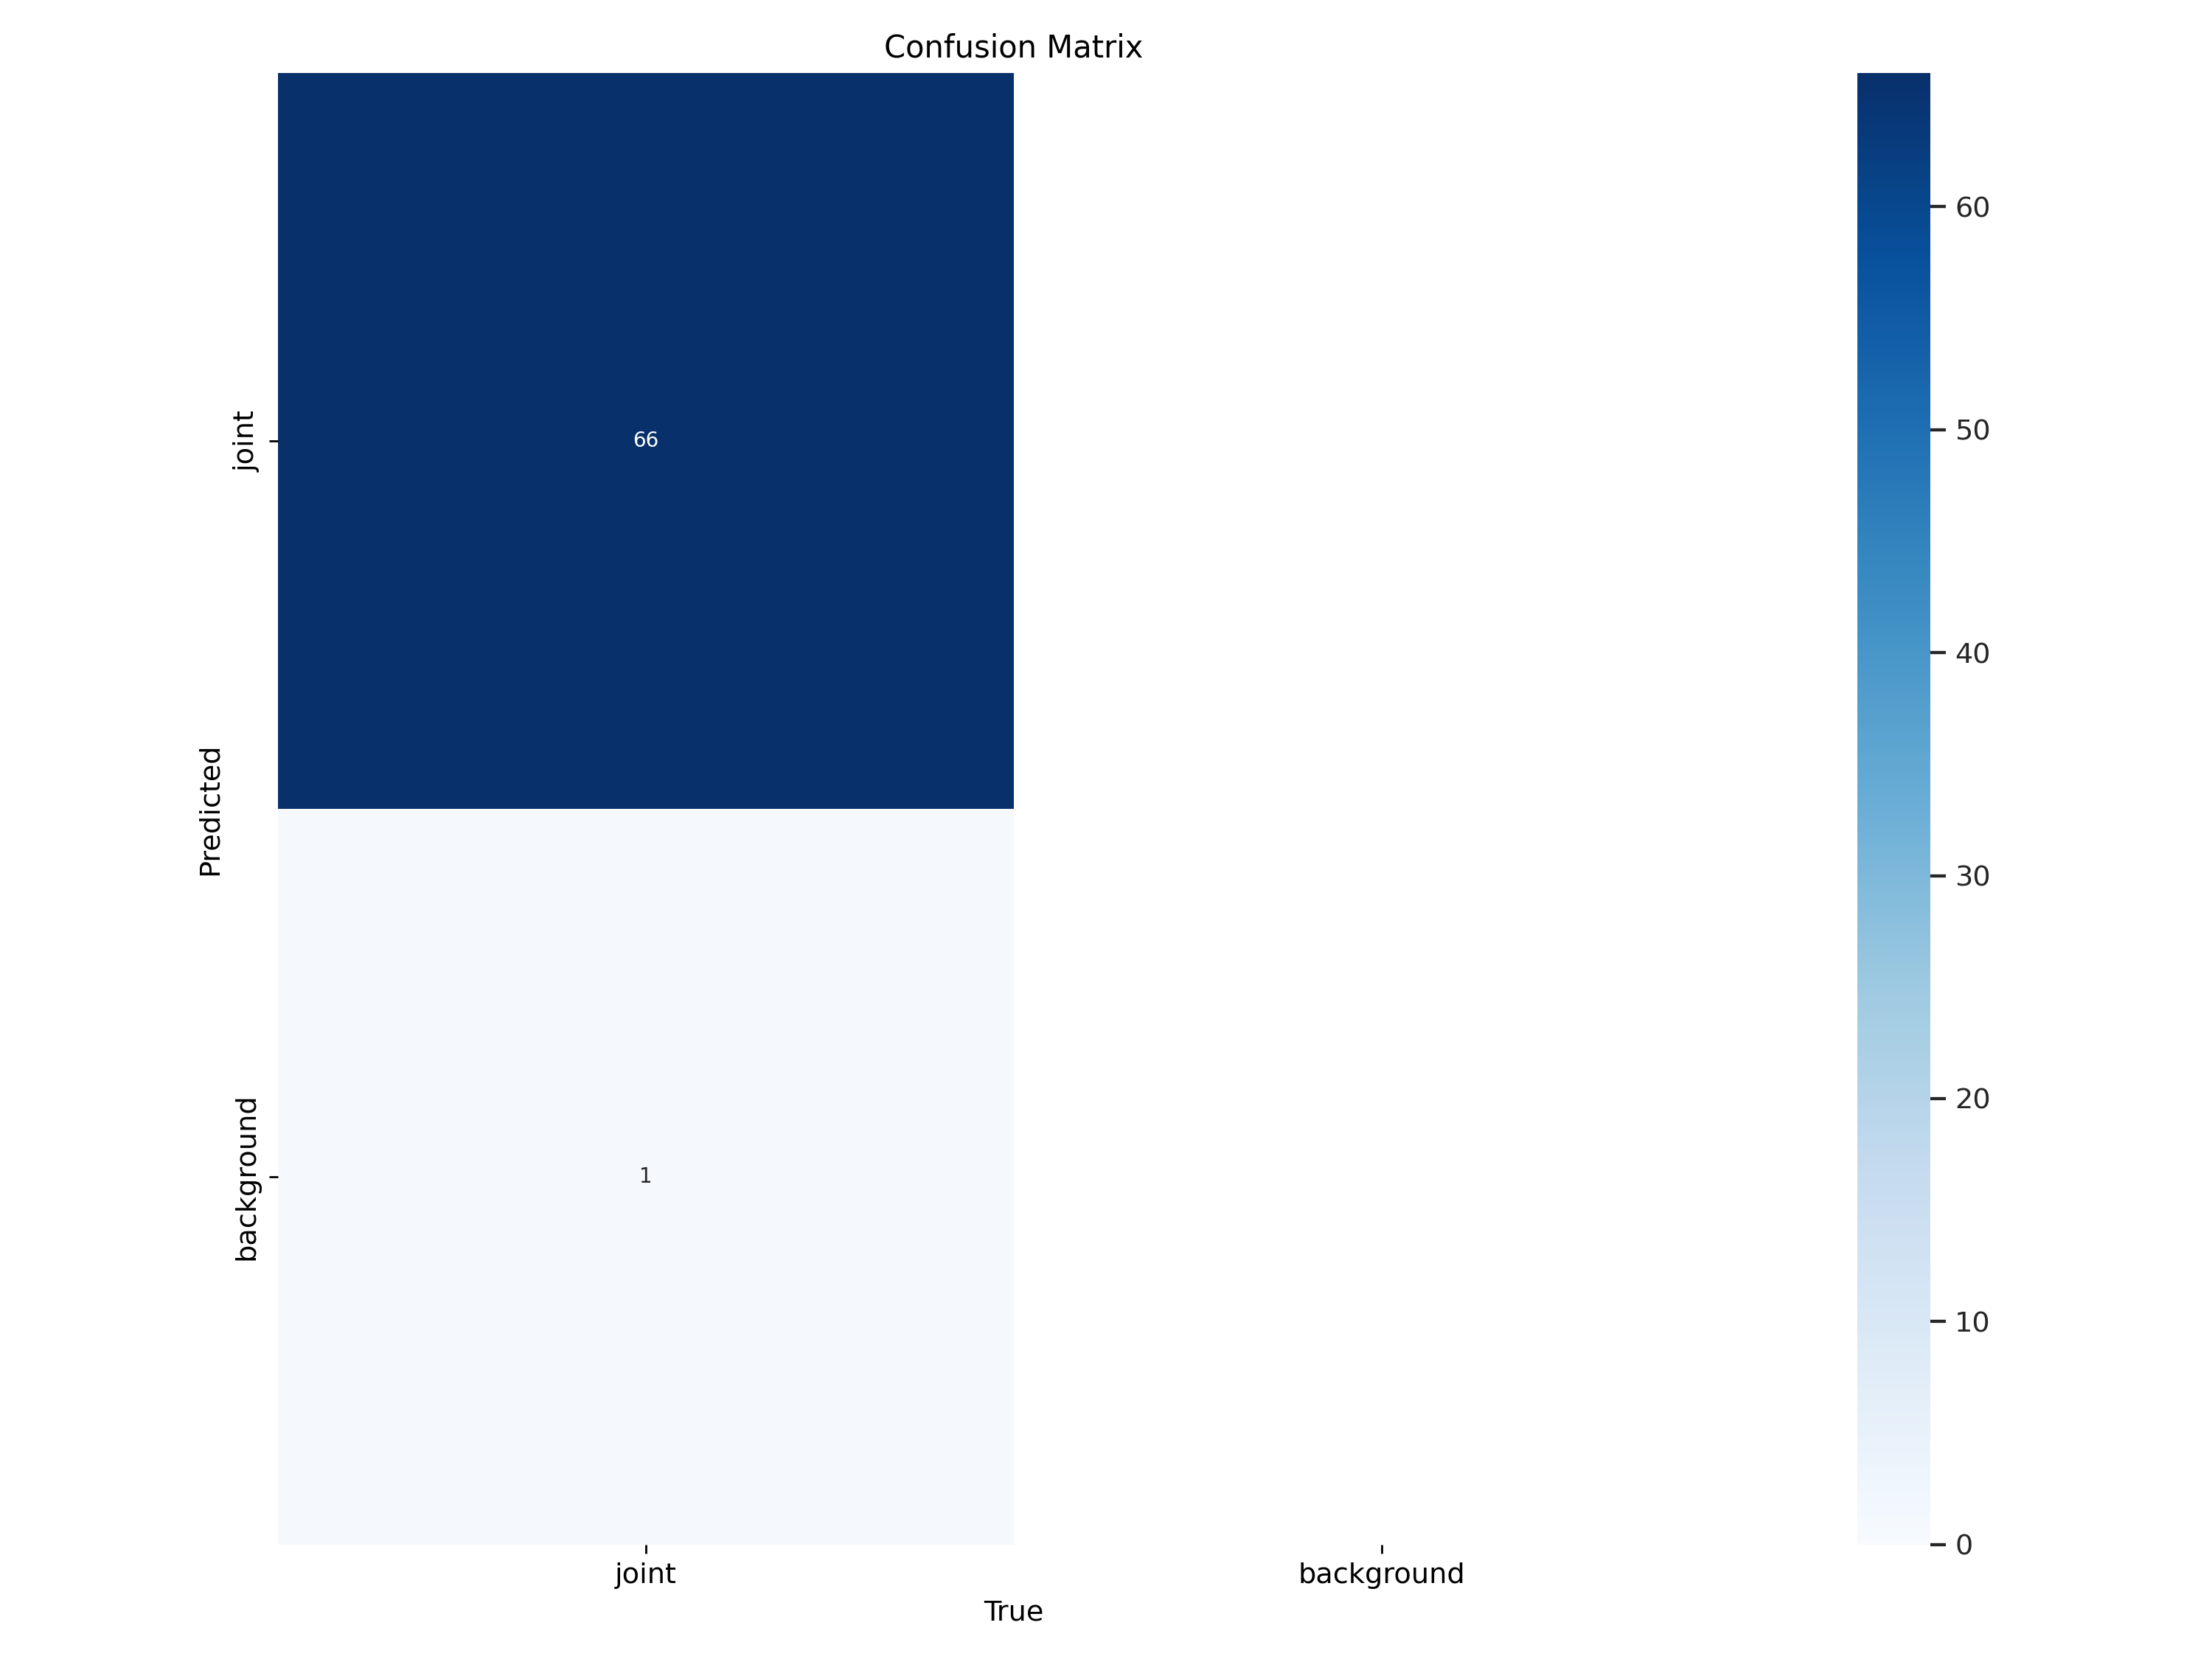

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


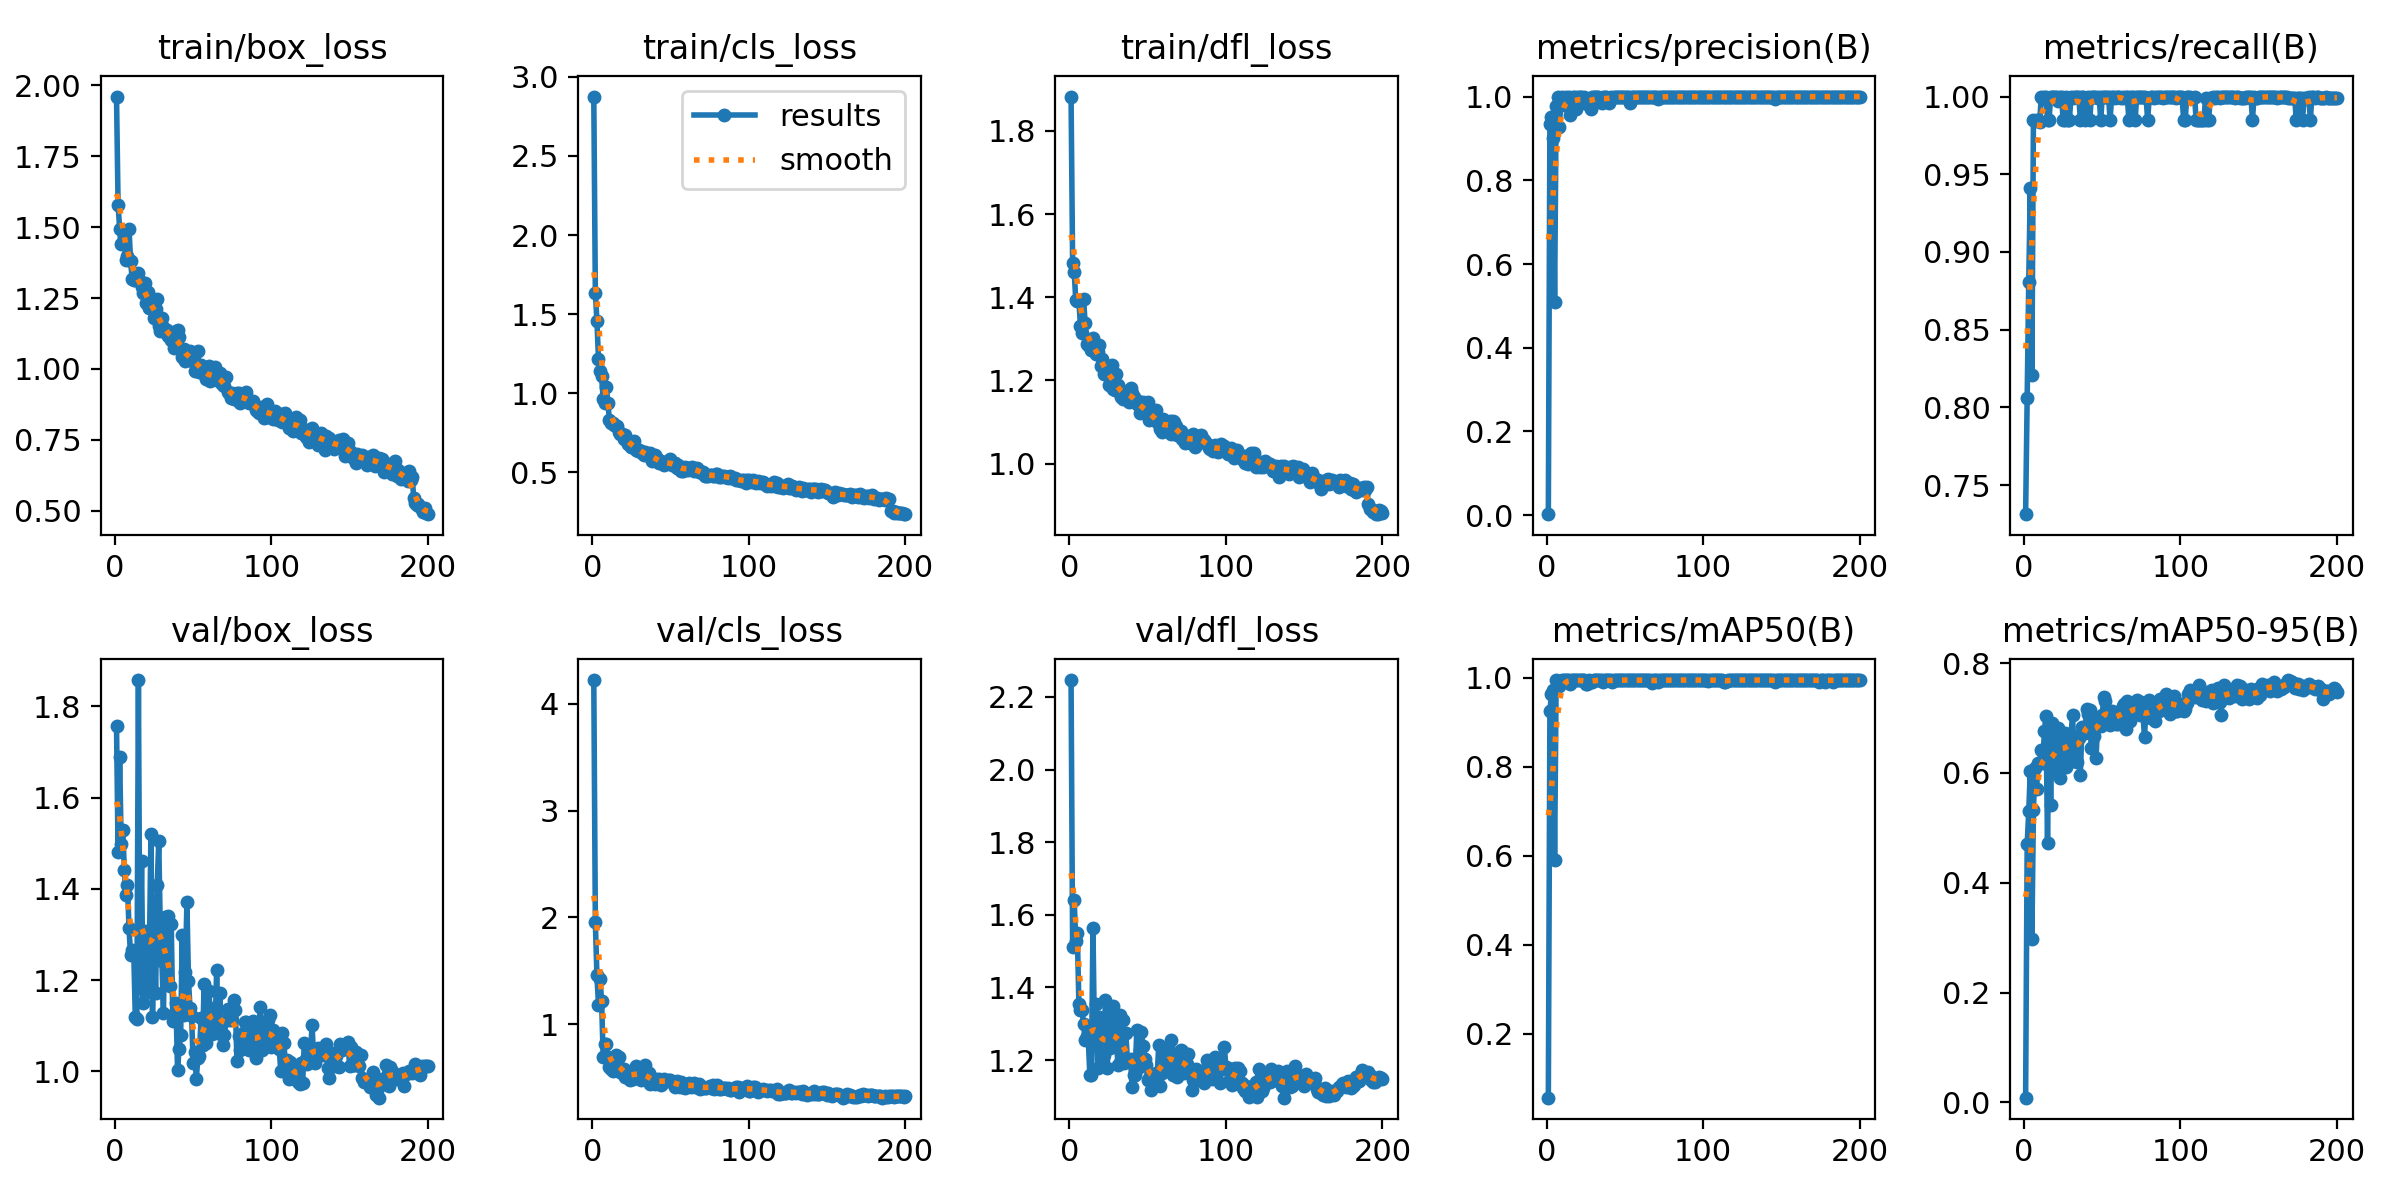

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=416)

/content


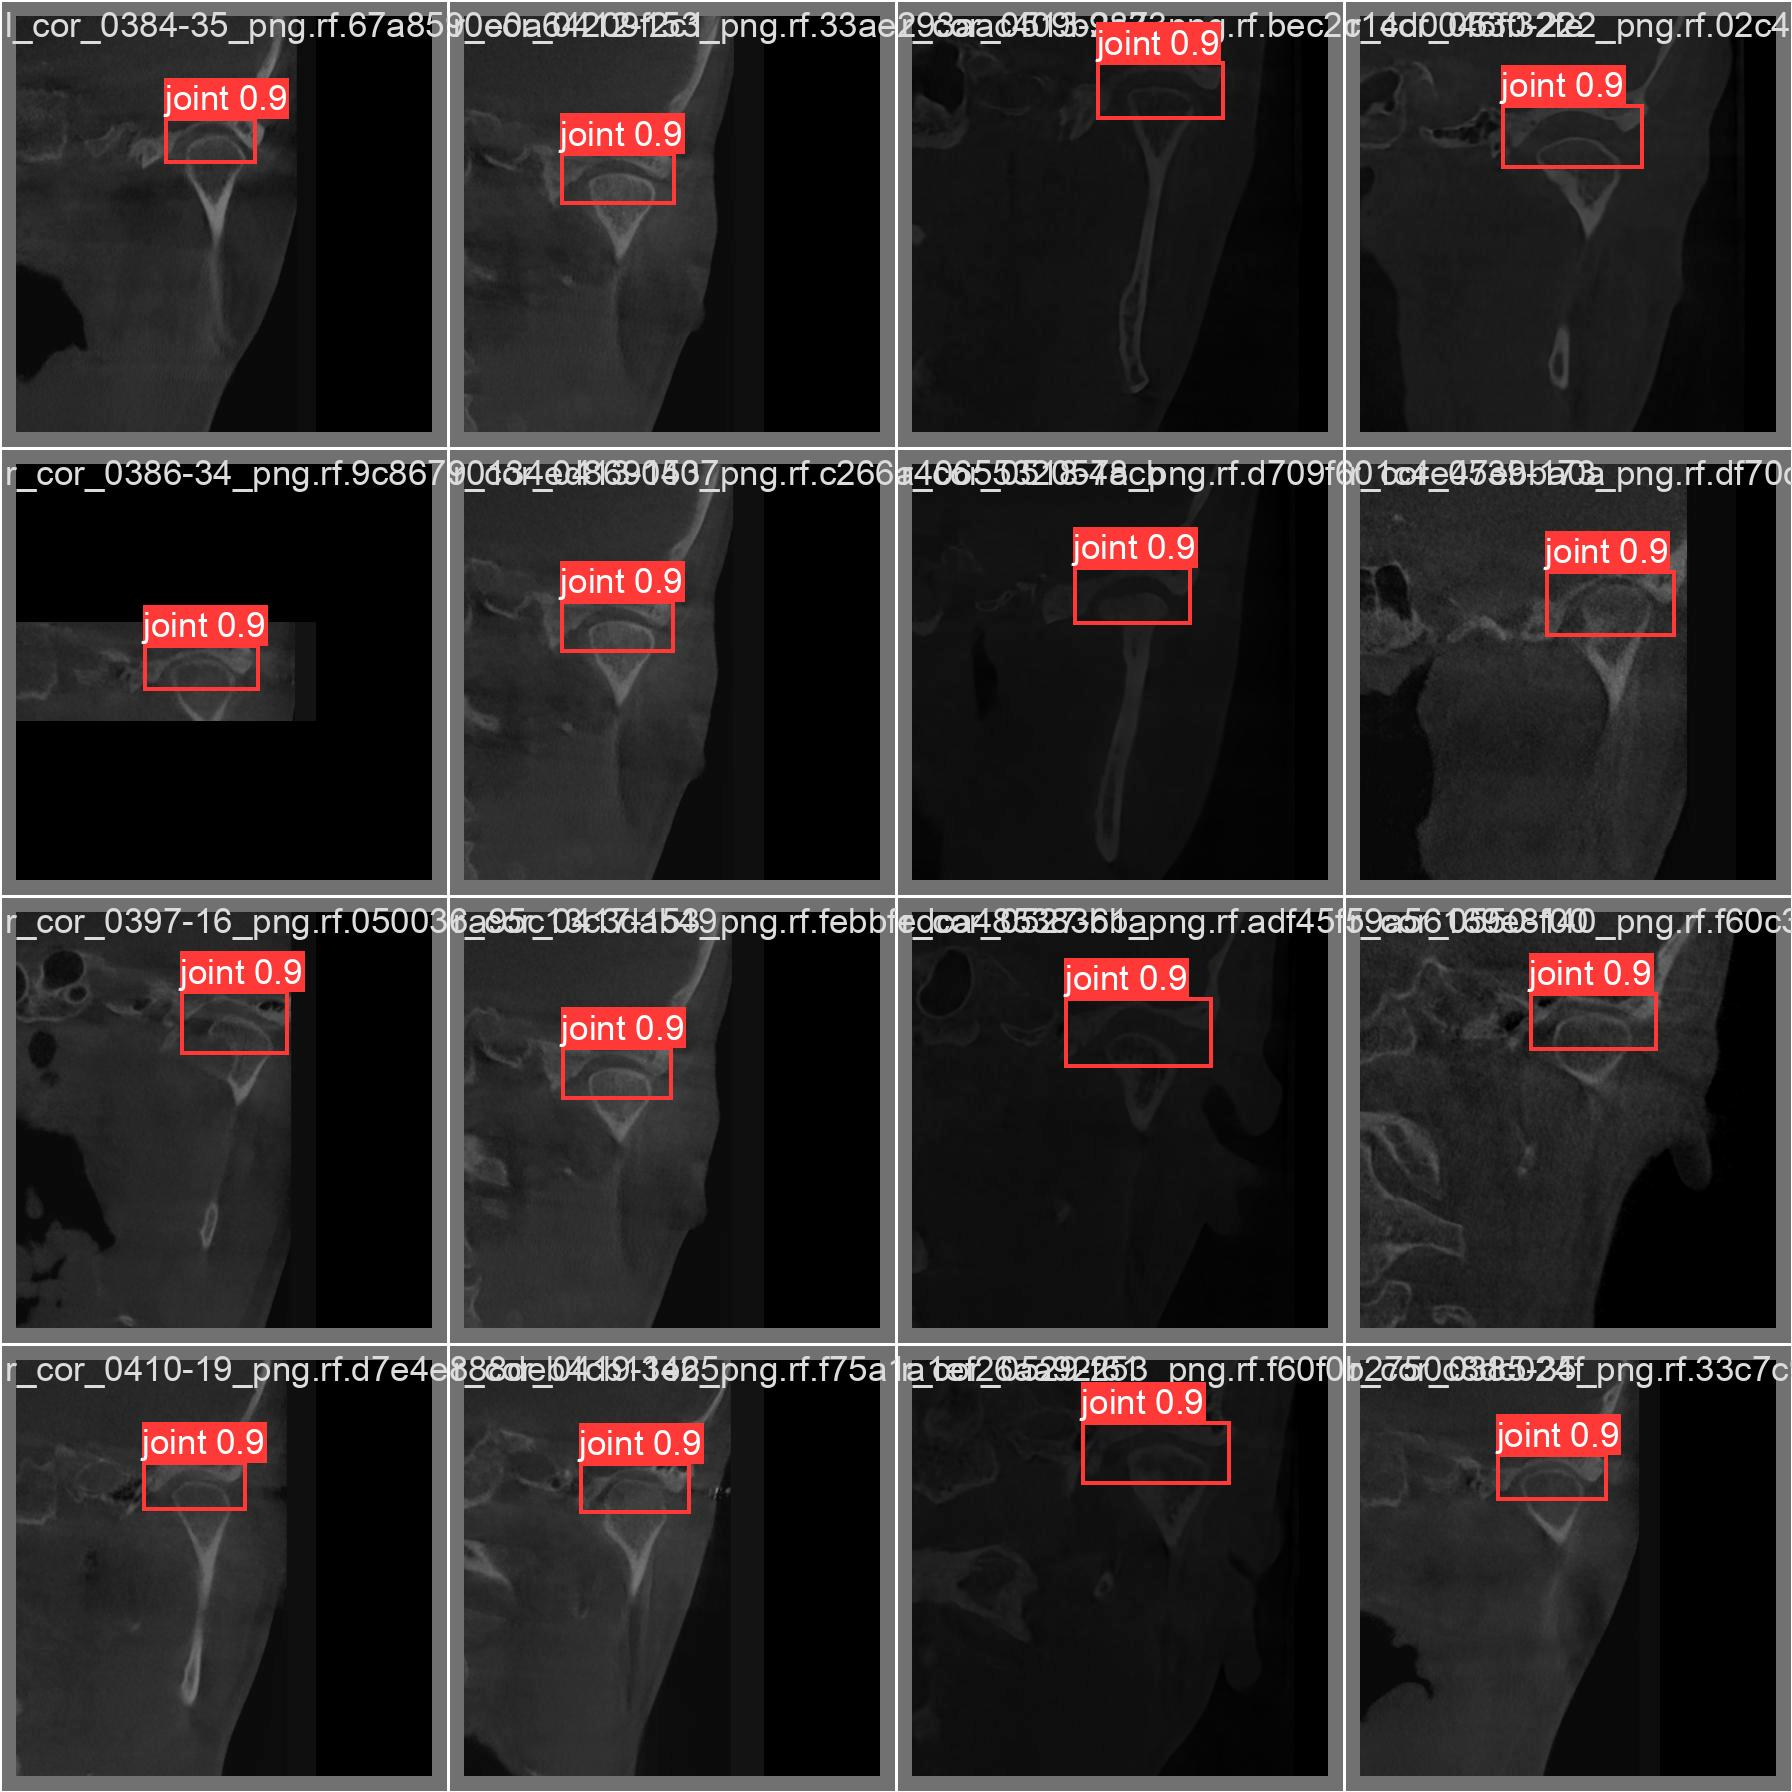

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=416)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/datasets/Joints-2/valid/labels.cache... 67 images, 0 backgrounds, 0 corrupt: 100% 67/67 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:02<00:00,  1.83it/s]
                   all         67         67          1      0.999      0.995      0.768
Speed: 0.9ms preprocess, 11.5ms inference, 0.0ms loss, 10.2ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/51 /content/datasets/Joints-2/test/images/l_cor_0385-132_png.rf.8e2fc860752d08b6eba8e7039029af11.jpg: 416x416 1 joint, 10.1ms
image 2/51 /content/datasets/Joints-2/test/images/l_cor_0387-34_png.rf.2663de42cf468edf1a2890cce8cf22a0.jpg: 416x416 1 joint, 6.6ms
image 3/51 /content/datasets/Joints-2/test/images/l_cor_0391-153_png.rf.24f3853e14046865835cc1b817ee2ca6.jpg: 416x416 1 joint, 5.9ms
image 4/51 /content/datasets/Joints-2/test/images/l_cor_0391-17_png.rf.278c992f02a47a81a0f96add842c9ea7.jpg: 416x416 1 joint, 5.6ms
image 5/51 /content/datasets/Joints-2/test/images/l_cor_0398-19_png.rf.bb5bcd235baaee04f8621c43b84f9481.jpg: 416x416 1 joint, 5.7ms
image 6/51 /content/datasets/Joints-2/test/images/l_cor_0399-19_png.rf.bcb02cae75d84d634a1d24a39cb31f87.jpg: 416x416 1 joint, 5.6ms
image 7/51 /content/datasets

**NOTE:** Let's take a look at few results.

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
#results = model.predict(source='/content/datasets/Joints-1/test/images/l_cor_0385-132_png.rf.269bb867ff7113338c3297ea094e915b.jpg', conf=0.25)
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='/content/datasets/Joints-2/test/images/l_cor_0569-3_png.rf.e24bd4021e81896229563a1c06965c1a.jpg' save=True


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/datasets/Joints-2/test/images/l_cor_0569-3_png.rf.e24bd4021e81896229563a1c06965c1a.jpg: 416x416 2 joints, 9.8ms
Speed: 1.3ms preprocess, 9.8ms inference, 603.7ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
%cd {HOME}
model = YOLO(f'{HOME}/runs/detect/train/weights/best.pt')
results = model.predict(source='/content/datasets/Joints-2/test/images/l_cor_0569-3_png.rf.e24bd4021e81896229563a1c06965c1a.jpg', conf=0.25)

/content



WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/datasets/Joints-2/test/images/l_cor_0569-3_png.rf.e24bd4021e81896229563a1c06965c1a.jpg: 416x416 2 joints, 9.2ms
Speed: 1.5ms preprocess, 9.2ms inference, 858.4ms postprocess per image at shape (1, 3, 416, 416)


In [ ]:
results[0].boxes.xyxy

tensor([[2.0155e+02, 6.7032e+01, 3.3645e+02, 1.3141e+02],
        [1.3018e-02, 3.0754e+01, 2.4797e+01, 1.2502e+02]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.8768, 0.2501], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([0., 0.], device='cuda:0')

In [ ]:
#### нужно проверить!!!

# Extract bounding boxes, classes, names, and confidences
boxes = results[0].boxes.xyxy.tolist()
classes = results[0].boxes.cls.tolist()
names = results[0].names
confidences = results[0].boxes.conf.tolist()

# Iterate through the results
for box, cls, conf in zip(boxes, classes, confidences):
    x1, y1, x2, y2 = box
    confidence = conf
    detected_class = cls
    name = names[int(cls)]



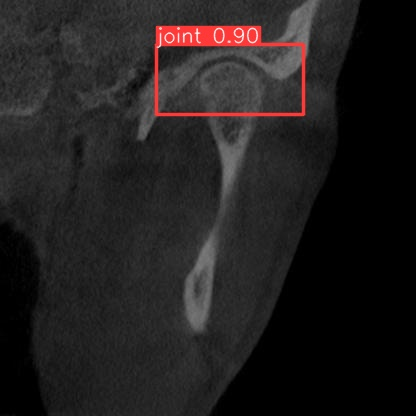

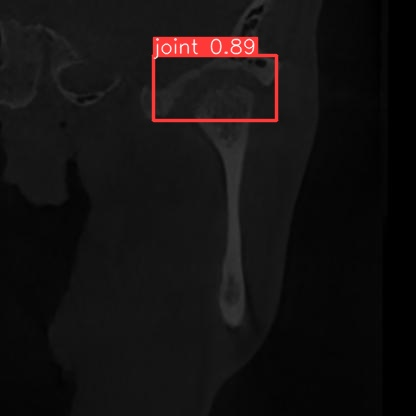

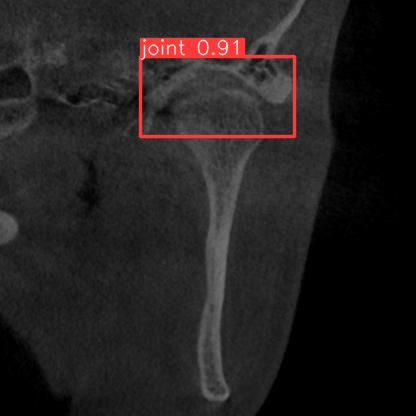

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
!zip -r -q '/content/runs.zip' /content/runs